# Implementación del algoritmo KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8,4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [55]:
df_st = pd.read_csv('./DATA/data_ST.csv', sep=',')
df_n = pd.read_csv('./DATA/data_N.csv', sep=',')
df_st.head()

,exoplanet_type,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,ST,0.144468,0.144468,0.144468,0.144468,0.144468,0.144468,0.144468,0.144468,0.144468,...,0.147566,0.147565,0.147564,0.147563,0.147562,0.147561,0.147561,0.147560,0.147560,0.147559
1,ST,0.144337,0.144337,0.144337,0.144337,0.144337,0.144337,0.144337,0.144337,0.144337,...,0.148811,0.148808,0.148806,0.148804,0.148802,0.148800,0.148798,0.148797,0.148796,0.148796
2,ST,0.144429,0.144429,0.144429,0.144429,0.144429,0.144429,0.144429,0.144429,0.144429,...,0.147843,0.147842,0.147841,0.147840,0.147839,0.147838,0.147837,0.147836,0.147836,0.147835
3,ST,0.144364,0.144364,0.144364,0.144364,0.144364,0.144364,0.144364,0.144364,0.144364,...,0.148317,0.148315,0.148314,0.148312,0.148311,0.148310,0.148309,0.148308,0.148308,0.148307
4,ST,0.144421,0.144421,0.144421,0.144421,0.144421,0.144421,0.144421,0.144421,0.144421,...,0.148239,0.148237,0.148234,0.148232,0.148230,0.148229,0.148227,0.148226,0.148225,0.148225


In [56]:
# Spectrum data from mini-neptunes and super-earths like
df_spects = pd.concat([df_st, df_n])

In [57]:
# Mezclar el dtaset de forma aleatoria
df_spects = df_spects.sample(frac=1).reset_index(drop=True)
df_spects.head()

,exoplanet_type,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,N,0.154794,0.154433,0.154076,0.153726,0.153381,0.153043,0.152711,0.152385,0.152064,...,0.217188,0.217144,0.217103,0.217066,0.217033,0.217003,0.216978,0.216957,0.216940,0.216929
1,ST,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,...,0.147727,0.147726,0.147725,0.147724,0.147723,0.147722,0.147721,0.147721,0.147720,0.147720
2,N,0.155974,0.155580,0.155191,0.154808,0.154433,0.154064,0.153702,0.153347,0.152998,...,0.223867,0.223824,0.223784,0.223747,0.223714,0.223685,0.223660,0.223639,0.223622,0.223611
3,N,0.155056,0.154687,0.154323,0.153965,0.153613,0.153268,0.152929,0.152595,0.152268,...,0.214252,0.214221,0.214192,0.214165,0.214141,0.214120,0.214102,0.214088,0.214076,0.214068
4,ST,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,...,0.147884,0.147882,0.147880,0.147879,0.147877,0.147876,0.147875,0.147874,0.147873,0.147873


<AxesSubplot:xlabel='exoplanet_type', ylabel='count'>

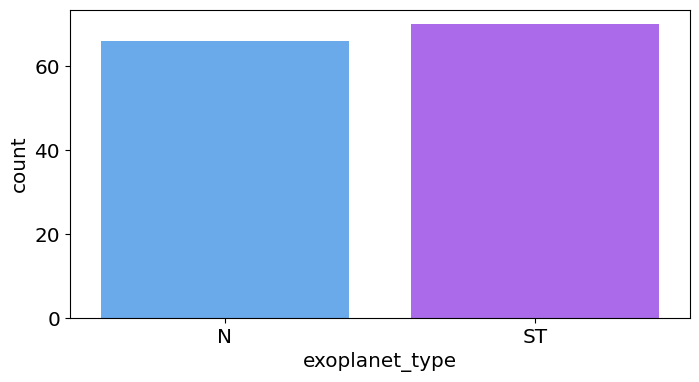

In [58]:
# Balance dataset
sns.countplot(x='exoplanet_type', data=df_spects, palette='cool')

In [59]:
# Data 
X_data = df_spects[df_spects.columns[1:]]
y_data = df_spects.exoplanet_type # label

X_data.head()

,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,0.34111413185408535,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,0.154794,0.154433,0.154076,0.153726,0.153381,0.153043,0.152711,0.152385,0.152064,0.151749,...,0.217188,0.217144,0.217103,0.217066,0.217033,0.217003,0.216978,0.216957,0.216940,0.216929
1,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,0.144444,...,0.147727,0.147726,0.147725,0.147724,0.147723,0.147722,0.147721,0.147721,0.147720,0.147720
2,0.155974,0.155580,0.155191,0.154808,0.154433,0.154064,0.153702,0.153347,0.152998,0.152654,...,0.223867,0.223824,0.223784,0.223747,0.223714,0.223685,0.223660,0.223639,0.223622,0.223611
3,0.155056,0.154687,0.154323,0.153965,0.153613,0.153268,0.152929,0.152595,0.152268,0.151946,...,0.214252,0.214221,0.214192,0.214165,0.214141,0.214120,0.214102,0.214088,0.214076,0.214068
4,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,0.144456,...,0.147884,0.147882,0.147880,0.147879,0.147877,0.147876,0.147875,0.147874,0.147873,0.147873


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95, 3000), (41, 3000), (95,), (41,))

## Entrenamiento y GridSearch: Búsqueda de mejores hiperparámetros

In [61]:
def graph_neighbors(X_train, y_train, X_test, y_test):
    
    training_accuracy = []
    test_accuracy = []

    # try n_neighbors from 1 to 10
    neighbors_settings = range(1, 20)

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.grid()
    plt.legend()

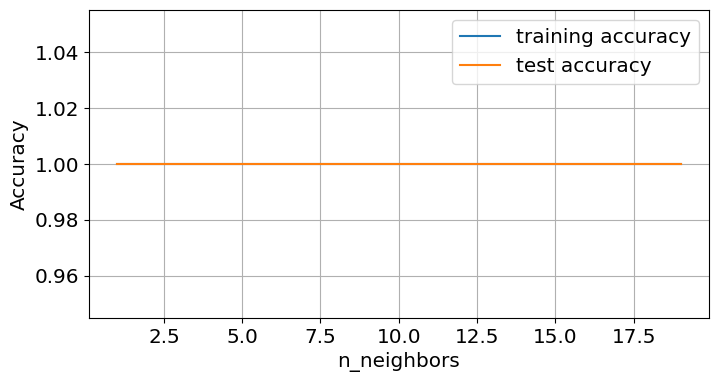

In [62]:
graph_neighbors(X_train, y_train, X_test, y_test)

El modelo no parece depender de la cantidad de vecinos que se tomen, por lo cual los dos conjuntos de datos son altamente diferenciables. Aún así, se buscará el mejor grupo de hiperparámetros.

In [63]:
def model(X_train, y_train):
    
    knn = KNeighborsClassifier()  
    
    param_grid = dict(n_neighbors=[4,5], 
                      weights=['uniform', 'distance'],
                      algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])

    grid = GridSearchCV(knn, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    best_param = grid.best_params_
    
    print('Mejores hiperparámetros',grid.best_params_)
    print('Mejor score',grid.best_score_)
    
    return best_param

In [64]:
best_param = model(X_train, y_train)

Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
Mejor score 1.0


## Modelo final 

Se usarán los mejores hiperparámetros para enternar el modelo final. 


In [65]:
def train_test_model(X_train, y_train, X_test, y_test, y_data, best_param):
    
    clf = KNeighborsClassifier(**best_param)
    clf.fit(X_train, y_train)

    p = clf.predict(X_test)
    
    #Importe el módulo de métricas de sklearn para medir el desempeño (accuracy_score) de su modelo.
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, p))
    
    # Matrix de confusión
    mat = confusion_matrix(y_test, p)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
               xticklabels=['ST', 'N'],
               yticklabels=['ST', 'N'])
    plt.title('Matriz de confusión')
    plt.xlabel('Categoría real')
    plt.ylabel('Categoría Predicha')
    print(classification_report(y_test, p))
    
    
    #train model with cv of 5 
    cv_scores = cross_val_score(clf, X_test , y_test, cv=5)
    #print each cv score (accuracy) and average them
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
    # Show first two principal components without scaler
    pca = PCA()
    plt.figure(figsize=(8,6))
    Xt = pca.fit_transform(X_test)
    plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_test.astype("category").cat.codes)
    plt.legend(handles=plot.legend_elements()[0], labels=['ST', 'N'])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Primeros dos componenetes principales")
    plt.grid()
    plt.show()
    
    return p

Train set Accuracy:  1.0
Test set Accuracy:  1.0
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        20
          ST       1.00      1.00      1.00        21

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

[1. 1. 1. 1. 1.]
cv_scores mean:1.0


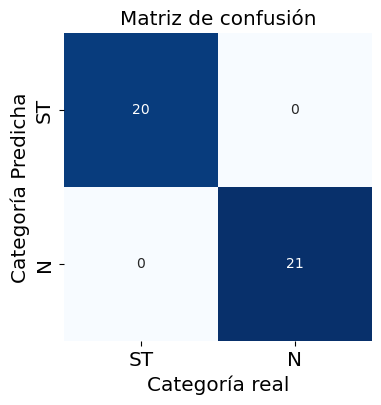

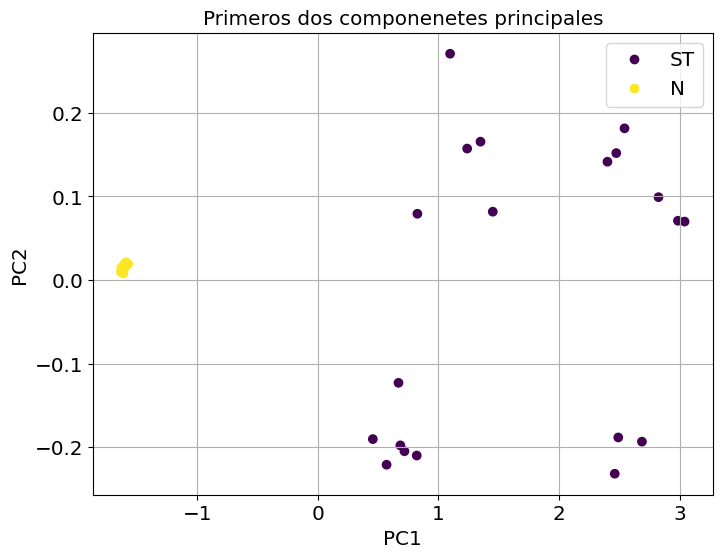

In [66]:
pred_vis = train_test_model(X_train, 
                            y_train, 
                            X_test, 
                            y_test, 
                            y_data, 
                            best_param)